[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/morphology_101.ipynb)


# Introduction to Morphological Operators

In this tutorial you are gonna explore **kornia.morphology**, that's Kornia's module for differentiable Morphological Operators.

By the end, you will be able to use morphological operations as easy as:

`new_image = morph.operation(original_image, structuring_element)`

But first things first, let's prepare the environment.

## Download Kornia

If you don't have Kornia installed, you can download it using pip.

In [ ]:
%%capture
!pip install git+https://github.com/kornia/kornia

## Prepare the image

With `kornia.morphology`, you can apply morphological operators in 3 channel color images. Besides, all operators are differentiable. Let's download and read an image.

In [ ]:
%%capture
!wget 'https://image.shutterstock.com/image-photo/portrait-surprised-cat-scottish-straight-260nw-499196506.jpg' -O img.jpg

We can use can use OpenCV to load the image.

In [ ]:
import cv2

img = cv2.imread("img.jpg")  # Download Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Define RGB

### Structuring element

We have the original image ready to go, now we need the second part in the operation, the structuring element (aka Kernel).

The kernel must be a 2-dim tensor with odd sides, i.e. 3x3.

In [ ]:
import kornia as K
import torch

device = "cpu"  # 'cuda:0' for GPU
kernel = torch.tensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).to(device)

# to torch.tensor
img_t = K.image_to_tensor(img, keepdim=False)
img_t = img_t.float() / 255.0

/home/edgar/software/kornia/kornia/augmentation/augmentation.py:1830: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  warnings.warn(


### Making plots!

In this tutorial we are gonna compare the images before and after transforming them.

It make sense to create a function to plot and see the changes!

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


def plot_morph_image(tensor):
    # kornia.tensor_to_image
    image = K.tensor_to_image(tensor.squeeze(0))  # Tensor to image

    # Plot before-after
    rcParams["figure.figsize"] = 20, 20
    fig, ax = plt.subplots(1, 2)
    ax[0].axis("off")
    ax[0].imshow(img)
    ax[1].axis("off")
    ax[1].imshow(image)

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Morphology

The main goal of kornia.morphology is that you could easily implement several morphological operator as follows:

`new_image = morph.operation(original_image, structuring_element)`

Let's check them all!

### Dilation

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


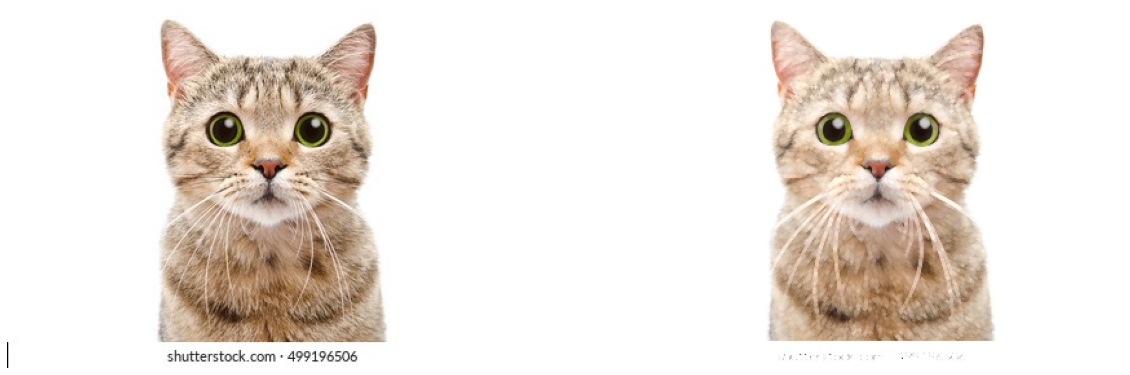

In [ ]:
from kornia import morphology as morph

dilated_image = morph.dilation(img_t, kernel)  # Dilation
plot_morph_image(dilated_image)  # Plot

### Erosion

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


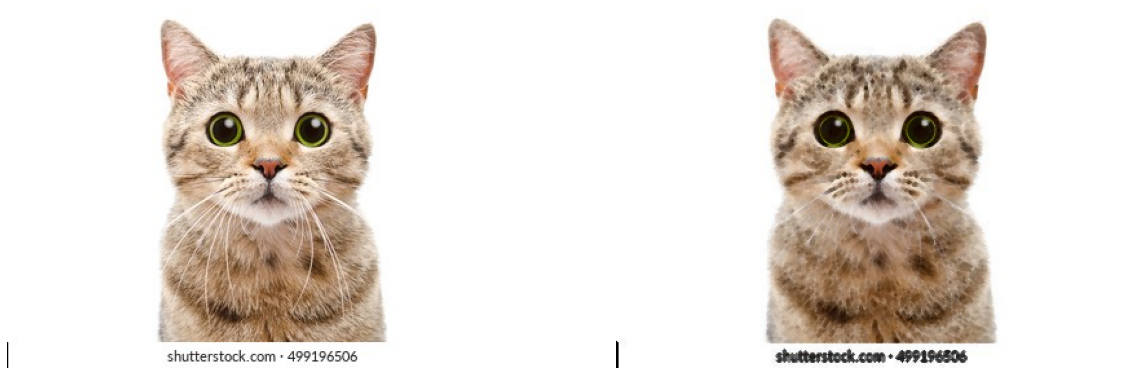

In [ ]:
eroded_image = morph.erosion(img_t, kernel)  # Erosion
plot_morph_image(eroded_image)  # Plot

### Open

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


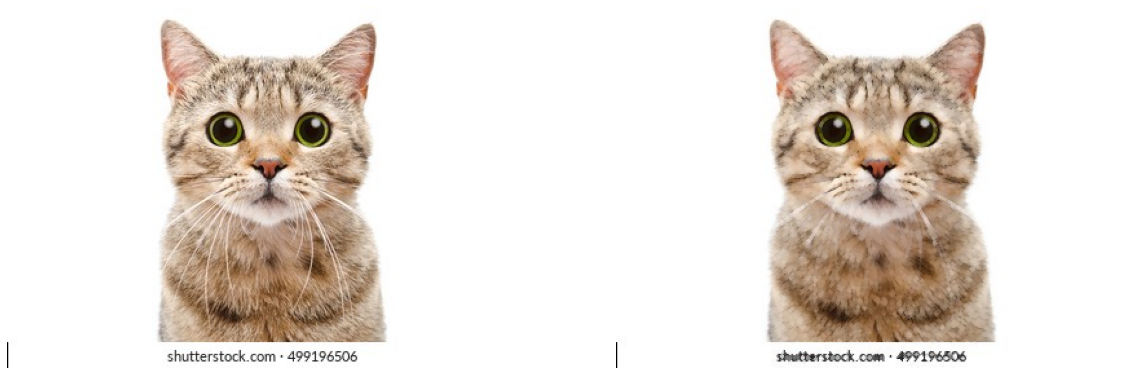

In [ ]:
opened_image = morph.opening(img_t, kernel)  # Open
plot_morph_image(opened_image)

### Close

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


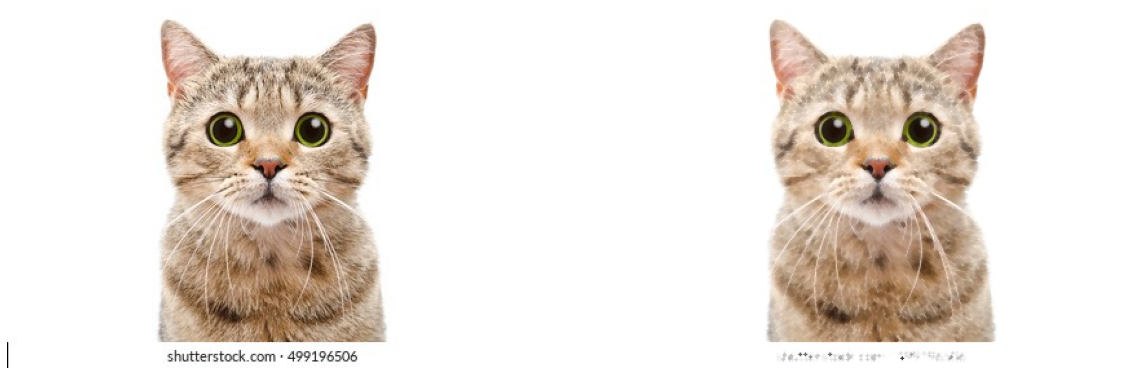

In [ ]:
closed_image = morph.closing(img_t, kernel)  # Close
plot_morph_image(closed_image)  # Plot

### Morphological Gradient

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


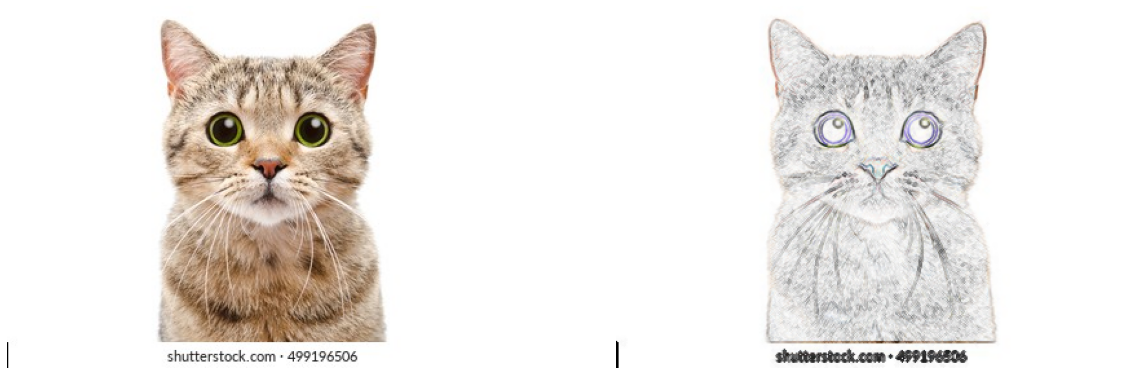

In [ ]:
graded_image = morph.gradient(img_t, kernel)  # Morphological gradient
plot_morph_image(1.0 - graded_image)

### Bottom Hat

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


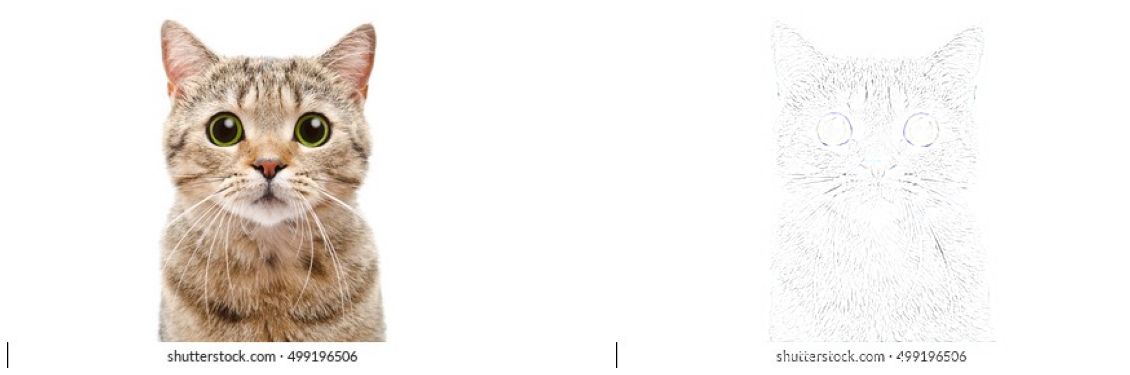

In [ ]:
bottom_image = morph.bottom_hat(img_t, kernel)  # Black Hat
plot_morph_image(1.0 - bottom_image)

### Top Hat

/home/edgar/software/tutorials/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


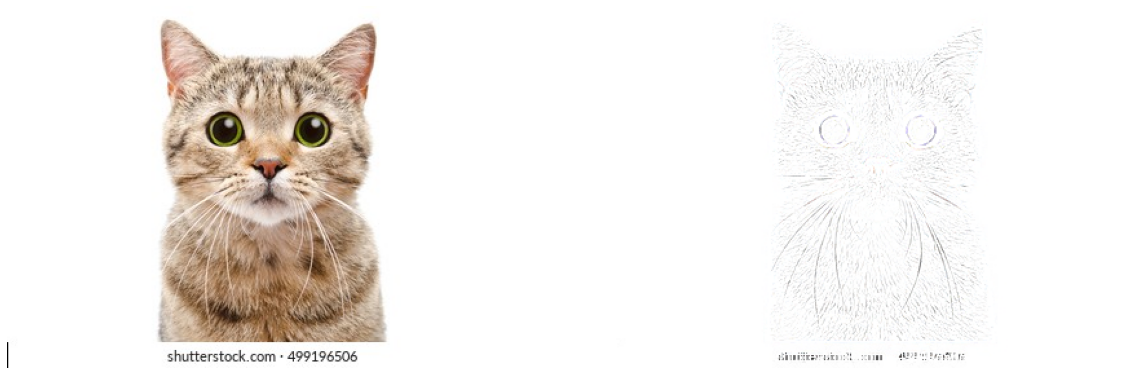

In [ ]:
toph_image = morph.top_hat(img_t, kernel)  # Top Hat
plot_morph_image(1.0 - toph_image)

## Conclusion

And that's it!

Now you know how to use Kornia to apply differentiable morphological operations in your PyTorch pipeline.

Many thanks for using Kornia, and have fun!